In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [3]:
data = np.array(raw_data)

In [4]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]

In [5]:
no_train = int(0.8*no_of_examples)
print(no_train,no_of_examples - no_train)

17290 4323


In [6]:
X_train = np.concatenate((data[:no_train,:-1],np.zeros((no_train,1))+1),axis=1)
y_train = data[:no_train,-1]
X_test = np.concatenate((data[no_train:,:-1],np.zeros((no_of_examples-no_train,1))+1),axis=1)
y_test = data[no_train:,-1].reshape(-1,1)

In [7]:
X_mean = np.mean(X_train[:,:-1],axis=0)
X_std = np.std(X_train[:,:-1],axis=0)
X_train[:,:-1] = (X_train[:,:-1] - X_mean)/X_std
X_test[:,:-1] = (X_test[:,:-1]-X_mean)/X_std
#print(X_test,X_train)

In [8]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [9]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) 
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W)
    
    def train_IRLS(self):
        self.W -= np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T.dot(self.X).dot(self.W) - self.X.T.dot(self.y))
        
        return loss
        
        
        
        

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
SGD_plot = []
for i in range(no_of_epochs):
    loss = model.train(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    SGD_plot.append(test_loss)

367961.752718
358885.182658
351839.856413
346313.733243
341929.119397
338408.095154
335545.970857
333191.441334
331232.013751
329583.430187
328182.039436
326979.309709
325937.879108
325028.704244
324228.991274
323520.684762
322889.355382
322323.374176
321813.293981
321351.381761
320931.261787
320547.64099
320196.095757
319872.90516
319574.919536
319299.456255
319044.216553
318807.218815
318586.744785
318381.296004
318189.558383
318010.37327
317842.713738
317685.665073
317538.40866
317400.20862
317270.400694
317148.382944
317033.607962
316925.576289
316823.830852
316727.952229
316637.554595
316552.282245
316471.806586
316395.82353
316324.051211
316256.227988
316192.110683
316131.473017
316074.104222
316019.807793
315968.400373
315919.710743
315873.578912
315829.855286
315788.399915
315749.0818
315711.778264
315676.374368
315642.762379
315610.841279
315580.516305
315551.698534
315524.30449
315498.255785
315473.478781
315449.904284
315427.467249
315406.106516
315385.764555
315366.387237
3

In [12]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
IRLS_plot = []
for i in range(no_of_epochs):
    loss = model.train_IRLS()
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    IRLS_plot.append(test_loss)

314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935.642707
314935

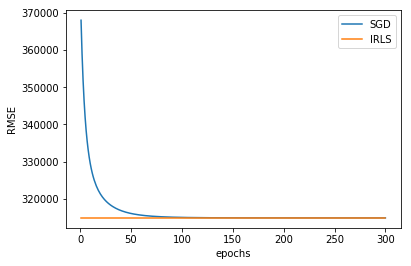

In [13]:
SGD_, = plt.plot(1+np.array(range(no_of_epochs)),SGD_plot)
IRLS_, = plt.plot(1+np.array(range(no_of_epochs)),IRLS_plot)
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.legend([SGD_, IRLS_],["SGD","IRLS"])

**Preferred optimization Algorithm for this Problem :**
For this problem, we would want to use Iterative re-weighted Least Square Algorithm. As we can see from the RMS vs no_of_iterations plot, this method gives us the correct result in 1 epoch, i.e., finds the solution to the optimization problem directly. 